In [1]:
import sys
print(sys.version)



3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]


In [2]:
from tensorflow.python.client import  device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18280041601875872274
 xla_global_id: -1]

In [3]:
#!pip install scikit-learn


In [4]:
#!pip install pandas

In [5]:
#!pip install opencv-python


In [6]:
#!pip install matplotlib


In [7]:
#!pip install matplotlib seaborn


In [8]:
#!pip install tqdm


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization
from sklearn import metrics 
from sklearn.metrics import classification_report
import time
from tqdm import tqdm



In [10]:
DATADIR =  "D:/birds/dataset/BirdVsDrone"

CATEGORIES = ["Birds","Drones"]
dataset = []
img_size = (100,100)
for category in tqdm(CATEGORIES):  
		path = os.path.join(DATADIR,category)  
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
				image_rgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
				new_array = cv2.resize(image_rgb, img_size)
				dataset.append([new_array, class_num])
			except Exception as e:
				pass
            

X = [] #features
Y = [] #labels

for features, label in dataset:
	X.append(features)
	Y.append(label)

100%|██████████| 2/2 [00:09<00:00,  4.89s/it]


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15,random_state=42)

X_train = np.array(X_train).reshape(-1, img_size[0], img_size[1], 3)
Y_train = np.array(Y_train).reshape(-1,)
X_train = ( X_train)/255

X_test = np.array(X_test).reshape(-1,  img_size[0], img_size[1], 3)
Y_test = np.array(Y_test).reshape(-1,)
X_test = (X_test)/255

In [12]:
# Plot here 
import matplotlib.pyplot as plt
%matplotlib inline
rand = np.random.randint(low=0, high=len(X_train)-1, size=20).tolist()
plt.figure(figsize=(224,224))
# loop to pick one number from the list and subplot it on its index
for i in rand:
    plt.subplot(5,4, rand.index(i)+1)
    plt.imshow(X_train[i])
    plt.title('This image belongs to class number {}'.format(Y_train[i]))
plt.show()

In [13]:
print('number of classes in the training dataset =' , len(np.unique(Y_train)))
print('number of classes in the Test dataset =' , len(np.unique(Y_test)))

number of classes in the training dataset = 2
number of classes in the Test dataset = 2


In [14]:
print('Shape of the training dataset =' , X_train.shape)
print('Shape of the Test dataset =' , X_test.shape)

Shape of the training dataset = (4222, 100, 100, 3)
Shape of the Test dataset = (746, 100, 100, 3)


# Building a CNN

In [16]:
from tensorflow.keras import Sequential, layers, regularizers
import tensorflow as tf

conv_filter = (5, 5)
pool = (4,4)
width = 1
l2_reg = regularizers.l2(0.001)  # You can adjust the regularization factor

model = Sequential()
model.add(tf.keras.layers.BatchNormalization(input_shape=(img_size[0], img_size[1], 3)))
model.add(layers.Conv2D(32 * width, conv_filter, padding='same', activation='tanh', kernel_regularizer=l2_reg))
model.add(layers.MaxPooling2D(pool_size=pool, strides=None))
#model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(32 * width, conv_filter, padding='same', activation='tanh', kernel_regularizer=l2_reg))
model.add(layers.MaxPooling2D(pool_size=pool, strides=None))
#model.add(layers.Dropout(0.1))
model.add(layers.Conv2D(64 * width, conv_filter, padding='same', activation='tanh', kernel_regularizer=l2_reg))
model.add(layers.MaxPooling2D(pool_size=pool, strides=None))
#model.add(layers.Conv2D(128 * width, conv_filter, padding='same', activation='tanh', kernel_regularizer=l2_reg))
#model.add(layers.MaxPooling2D(pool_size=pool, strides=None))

#model.add(layers.Conv2D(64 * width, conv_filter, padding='same', activation='relu', kernel_regularizer=l2_reg))
#model.add(layers.MaxPooling2D(pool_size=pool, strides=None))

#model.add(layers.Conv2D(128 * width, conv_filter, padding='same', activation='relu', kernel_regularizer=l2_reg))
#model.add(layers.MaxPooling2D(pool_size=pool, strides=None))
model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='tanh', kernel_regularizer=l2_reg))
model.add(layers.Dense(128, activation='tanh', kernel_regularizer=l2_reg))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])


E:\anaconda\Library\ana\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 100, 100, 3)    │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 25, 25, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 6, 6, 64)       │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,789 (342.93 KB)

 Trainable params: 87,783 (342.90 KB)

 Non-trainable params: 6 (24.00 B)

In [17]:
# from keras.models import Sequential
#import tensorflow as tf
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense, Dropout, Flatten
#model = Sequential()
#model.add(Flatten(input_shape = X_train.shape[1:]))
#model.add(Dense(800, activation='relu'))
#model.add(Dense(600, activation='relu'))
#model.add(Dense(150, activation='relu'))
#model.add(Dense(10, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
# Compile model
#model.compile(loss='BinaryCrossentropy', optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])

In [18]:
history = model.fit(X_train, Y_train, epochs =150, shuffle = True,batch_size=64,
                    validation_split = 0.1)

Epoch 1/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 201ms/step - accuracy: 0.6033 - loss: 0.8225 - val_accuracy: 0.6123 - val_loss: 0.8048
Epoch 2/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 190ms/step - accuracy: 0.7499 - loss: 0.6852 - val_accuracy: 0.7352 - val_loss: 0.6926
Epoch 3/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.7738 - loss: 0.6435 - val_accuracy: 0.8061 - val_loss: 0.5980
Epoch 4/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 192ms/step - accuracy: 0.8043 - loss: 0.5981 - val_accuracy: 0.8274 - val_loss: 0.5636
Epoch 5/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - accuracy: 0.8199 - loss: 0.5647 - val_accuracy: 0.8747 - val_loss: 0.5186
Epoch 6/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 12s 193ms/step - accuracy: 0.8405 - loss: 0.5461 - val_accuracy: 0.8652 - val_loss: 0.4836
Epoch 7/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 19s 318ms/step - accuracy: 0.8408 - loss: 0.5237 - val_accuracy: 0.8889 - val_loss: 0.4615
Epoch 8/150
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - accuracy: 0.8388 - loss: 0.5226 - 

In [19]:
#resultsStore = "D:/birds/New folder"
#modelName = 'Birdsvsdrones'

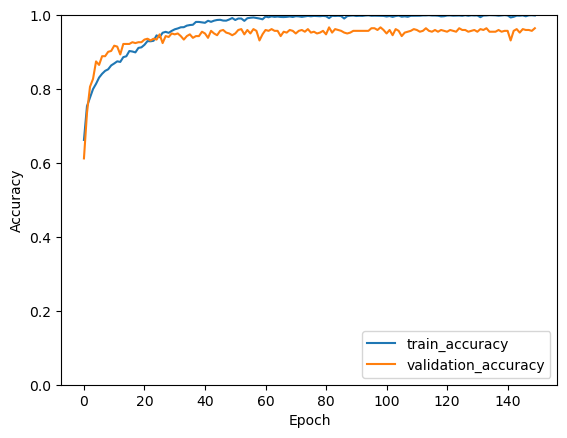

In [20]:
import os
import matplotlib.pyplot as plt

resultsStore = "D:/birds/New folder/"
modelName = 'Birdsvsdrones'

# Create the directory if it doesn't exist
os.makedirs(resultsStore + modelName, exist_ok=True)

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

# Save the plot to the specified directory
plt.savefig(resultsStore + modelName + '/accuracy.png', facecolor='white')
plt.show()


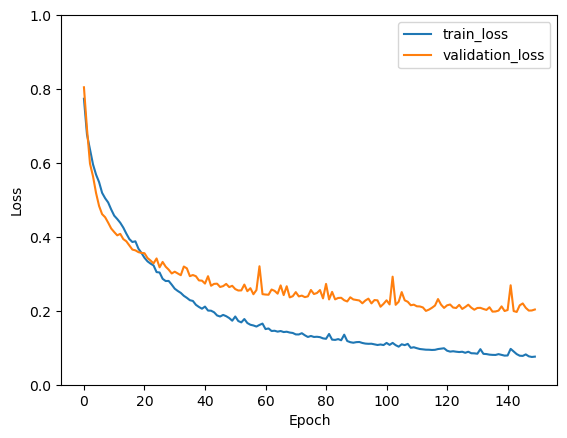

In [21]:
import os
import matplotlib.pyplot as plt

resultsStore = "D:/birds/New folder/"
modelName = 'Birdsvsdrones'

# Ensure the directory exists
os.makedirs(resultsStore + modelName, exist_ok=True)

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')

# Save the loss plot to the same directory
plt.savefig(resultsStore + modelName + '/loss.png', facecolor='white')
plt.show()


24/24 - 1s - 22ms/step - accuracy: 0.9611 - loss: 0.1887
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step
Test accuracy = 96.11260053619303 %

              precision    recall  f1-score   support

      Drones       0.96      0.96      0.96       379
       Birds       0.96      0.96      0.96       367

    accuracy                           0.96       746
   macro avg       0.96      0.96      0.96       746
weighted avg       0.96      0.96      0.96       746



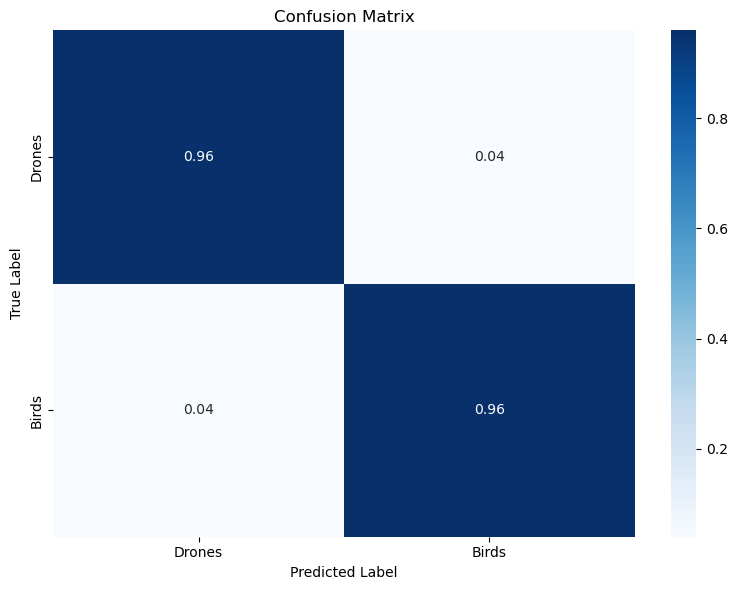

In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import os

# Assuming `model` is your compiled TensorFlow model

# Evaluate model
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)

# Predict classes
Y_te_probs = model.predict(X_test)
Y_te = (Y_te_probs > 0.5).astype(int).flatten()

# Calculate confusion matrix
cm = tf.math.confusion_matrix(Y_test, Y_te)

# Calculate accuracy
acc = metrics.accuracy_score(Y_test, Y_te)
print("Test accuracy =", acc * 100, "%\n")

# Print classification report
print(classification_report(Y_test, Y_te, target_names=["Drones", "Birds"]))

# Normalize confusion matrix
con_mat = cm.numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

# Define class labels
classes = ["Drones", "Birds"]

# Create DataFrame for confusion matrix
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()

# Ensure the directory exists before saving
os.makedirs(resultsStore + modelName, exist_ok=True)

# Save the confusion matrix plot
plt.savefig(resultsStore + modelName + '/confusionMatrix.png', facecolor='white')
plt.show()


In [23]:
# Assuming you have already trained and evaluated your model

# Predict classes for test set
Y_te = np.array(tf.math.argmax(model.predict(X_test), axis=1))

# Print predictions and true labels
print("Predictions:", Y_te)
print("True Labels:", Y_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [24]:
# Compare predictions with true labels
misclassified = np.sum(Y_te != Y_test)

# Print the number of misclassified predictions
print("Number of misclassified predictions:", misclassified)


Number of misclassified predictions: 367


In [25]:
import os

# Ensure the directory exists before saving the model
model_dir = resultsStore + modelName
os.makedirs(model_dir, exist_ok=True)

# Save the model
model.save(model_dir + '/model.h5')


In [55]:
modelSaveName = '/ResNet50V2.h5'
modelPath = "C:/Users/HP/Downloads/mymodel" + modelSaveName
model.save(modelPath)
modelSize = os.path.getsize(modelPath)
print('Model Size:')
print(format(modelSize/1000000,'0.6'))

Model Size:
1.11041
